# Scipy Stats & Anova

This Jupyter Notebook will contain an introduction to the Scipy Stats Python library, as well as an introduction and example of a hypothesis test and ANOVA.

Resources

https://www.youtube.com/watch?v=0Vj2V2qRU10 <br>
https://online.stat.psu.edu/stat500/book/export/html/479<br>
https://www.scribbr.com/statistics/one-way-anova/<br>
https://learning.edanz.com/anova-explained/<br>
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/<br>
https://towardsdatascience.com/analysis-of-variance-anova-8dc889d2fc3a<br>
https://towardsdatascience.com/what-is-anova-and-when-do-we-use-it-e0dcd8759c4e<br>
https://medium.com/@peterflom/anova-why-analyze-variances-to-compare-means-e3d4bbd3c05<br>
https://towardsdatascience.com/anovas-three-types-of-estimating-sums-of-squares-don-t-make-the-wrong-choice-91107c77a27a<br>
https://medium.com/omarelgabrys-blog/statistics-probability-t-distribution-anova-d1422928e3a<br>

## More Resources

Anova tutorial - https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
* Mentions using a Tukey test post-hoc to see which groups had the difference<br>
6 assumptions: <br>
1) dependent variable is continuous, <br>
2) indepedent variables across 2 or 3 categories at least,<br> 
3) independence of observations (no observation can be in multiple categories), <br>
4) no significant outliers, <br>
5) dependent variable is normally distributed for each category, <br>
6) homogeneity of variances.<br>


Ancova tutorial - https://statistics.laerd.com/spss-tutorials/ancova-using-spss-statistics.php
* Similar to ANOVA but allows you to control for a 3rd measurement. e.g. if I'm looking at exercise and heartrate, but want to control for age.

Normality tests in python - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
* Dependent variable has to be normally distributed for each category.
* Can be done in scipy - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

Homogeneity of variances in Python - https://www.statology.org/levenes-test-python/
* https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/
* Also in Scipy - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

# Diet Dataset

Diet dataset - https://www.sheffield.ac.uk/mash/statistics/datasets
* Has 3 diet types
* Can look at differences in gender and age brackets



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diet_df = pd.read_csv('./possible-datasets/Diet_R.csv')

# A few observations don't have a value for gender, and have no difference in pre/post weight. Removing these.
diet_df = diet_df[diet_df['gender'].isin(['0', '1'])]

# Going to measure the weight change from each diet 
diet_df['weightChange'] = diet_df['pre.weight'] - diet_df['weight6weeks']

diet_df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightChange
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8


In [3]:
# Check how many I have in each group

diet_df['Diet'].value_counts()

3    27
2    25
1    24
Name: Diet, dtype: int64

In [4]:
# Splitting into DataFrames for each of the diets.

diet1 = diet_df[diet_df['Diet'] == 1]
diet2 = diet_df[diet_df['Diet'] == 2]
diet3 = diet_df[diet_df['Diet'] == 3]

# EDA

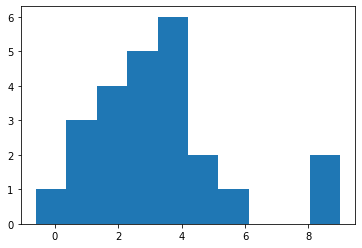

In [5]:
# Diet 1

plt.hist(diet1['weightChange']);

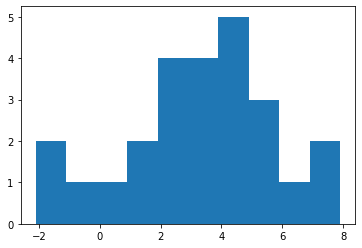

In [6]:
# Diet 2

plt.hist(diet2['weightChange']);

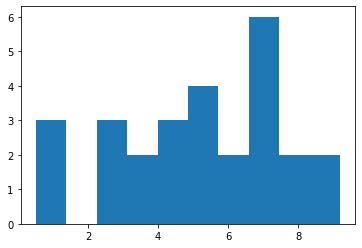

In [7]:
# Diet 3

plt.hist(diet3['weightChange']);

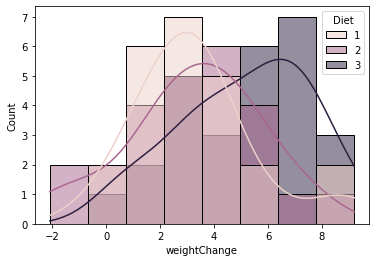

In [8]:
sns.histplot(data=diet_df, x='weightChange', hue='Diet', kde=True);

# Checking normality

In [9]:
from scipy import stats
stats.shapiro(diet1['weightChange'])

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [10]:
stats.shapiro(diet2['weightChange'])

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [11]:
stats.shapiro(diet3['weightChange'])

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

## Result - All 3 are Normal!

# Checking Homogeneity of Variance

In [12]:
stats.levene(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])

LeveneResult(statistic=0.46290764582507116, pvalue=0.6312856401117967)

## Result - They're grand!

# One way Anova

In [13]:
stats.f_oneway(diet1['weightChange'], diet2['weightChange'], diet3['weightChange'])

F_onewayResult(statistic=5.383104474859926, pvalue=0.006595853108669741)

There's a significant difference here ( pvalue=0.006).

Can't see a way to do Tukey in scipy.stats, so will use statsmodels here...
https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html<br>
https://www.statology.org/tukey-test-python/

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=diet_df['weightChange'],
                          groups=diet_df['Diet'],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.032    0.9 -1.6531 1.5891  False
     1      3   1.8481 0.0188  0.2567 3.4396   True
     2      3   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


## Result - Significant result between diets 1&3 and 2&3

# Other Datasets

Tsunami dataset <br>
https://www.kaggle.com/noaa/seismic-waves <br>
https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/event-search<br>

In [15]:
tsunami_df = pd.read_csv('./possible-datasets/sources.csv')

tsunami_df.columns

Index(['SOURCE_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'CAUSE',
       'VALIDITY', 'FOCAL_DEPTH', 'PRIMARY_MAGNITUDE', 'REGION_CODE',
       'COUNTRY', 'STATE/PROVINCE', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'MAXIMUM_HEIGHT', 'MAGNITUDE_ABE', 'MAGNITUDE_IIDA',
       'INTENSITY_SOLOVIEV', 'WARNING_STATUS', 'MISSING', 'MISSING_ESTIMATE',
       'INJURIES', 'INJURY_ESTIMATE', 'FATALITIES', 'FATALITY_ESTIMATE',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_ESTIMATE', 'HOUSES_DAMAGED',
       'HOUSE_DAMAGE_ESTIMATE', 'HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_ESTIMATE', 'ALL_MISSING', 'MISSING_TOTAL',
       'ALL_INJURIES', 'INJURY_TOTAL', 'ALL_FATALITIES', 'FATALITY_TOTAL',
       'ALL_DAMAGE_MILLIONS', 'DAMAGE_TOTAL', 'ALL_HOUSES_DAMAGED',
       'HOUSE_DAMAGE_TOTAL', 'ALL_HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_TOTAL'],
      dtype='object')

In [16]:
tsunami_df = tsunami_df[tsunami_df['PRIMARY_MAGNITUDE'].notna()]

In [17]:
japan_tsunami = tsunami_df[tsunami_df['COUNTRY'] == 'JAPAN']
indonesia_tsunami = tsunami_df[tsunami_df['COUNTRY'] == 'INDONESIA']
chile_tsunami = tsunami_df[tsunami_df['COUNTRY'] == 'CHILE']
greece_tsunami = tsunami_df[tsunami_df['COUNTRY'] == 'GREECE']
usa_tsunami = tsunami_df[tsunami_df['COUNTRY'] == 'USA']
philippines_tsunami = tsunami_df[tsunami_df['COUNTRY'] == 'PHILIPPINES']
italy_tsunami = tsunami_df[tsunami_df['COUNTRY'] == 'ITALY']

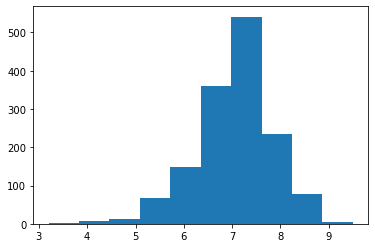

In [18]:
plt.hist(tsunami_df['PRIMARY_MAGNITUDE']);

ShapiroResult(statistic=0.967490553855896, pvalue=0.2584373950958252)

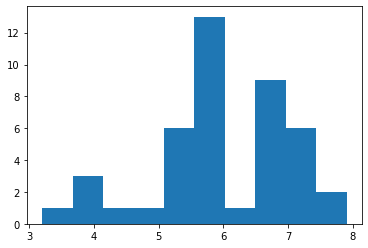

In [19]:
plt.hist(italy_tsunami['PRIMARY_MAGNITUDE']);

stats.shapiro(italy_tsunami['PRIMARY_MAGNITUDE'])

In [20]:
stats.levene(indonesia_tsunami['PRIMARY_MAGNITUDE'], 
             chile_tsunami['PRIMARY_MAGNITUDE'], 
             usa_tsunami['PRIMARY_MAGNITUDE'], 
             philippines_tsunami['PRIMARY_MAGNITUDE'])


LeveneResult(statistic=2.8013265938237155, pvalue=0.039734685046353434)

## USA, Chile, Indonesia & Philippines are OK to use. P>0.05
## Homogeneity is only 0.039 so will need to use another variation of ANOVA.

# Irish weather Dataset

Note - this dataset is not suitable, however it does show when the Shapiro test fails and another test is required.
I've also cut the filesize down massively be deleting all counties except Galway!
https://www.kaggle.com/conorrot/irish-weather-hourly-data

In [21]:
weather_df = pd.read_csv('./possible-datasets/hrly_Irish_weather.csv', usecols=['county', 'station', 'temp'])

weather_df['temp'] = weather_df['temp'].str.extract(r'(\d+.\d+)').astype('float')
weather_df = weather_df[weather_df['temp'].notna()]

/Users/Brian/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


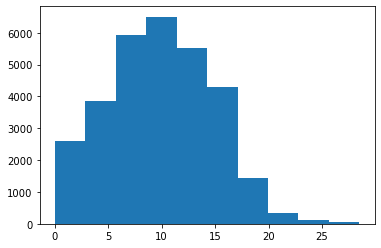

In [28]:
plt.hist(weather_df['temp']);

In [29]:
stats.shapiro(weather_df['temp'])

/Users/Brian/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9907283782958984, pvalue=1.8031390158499946e-39)

Dataset is too large to run Shapiro test, have to use Anderson test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

In [30]:
stats.anderson(weather_df['temp'], dist='norm')

AndersonResult(statistic=44.98928481940675, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Came out false anyway!